In [2]:
import torch
import torch.nn as nn

In [1]:
from PIL import Image
import requests

from transformers import CLIPProcessor, CLIPModel

model = CLIPModel.from_pretrained("./CLIP-VIT")
processor = CLIPProcessor.from_pretrained("./CLIP-VIT")

C:\Users\omalv\.conda\envs\acehacks\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
model = model.to('cuda')
url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(url, stream=True).raw)
inputs = processor(text=["a photo of a cat", "a photo of two cats"], images=image, return_tensors="pt", padding=True)
# outputs = model(**inputs)
# logits_per_image = outputs.logits_per_image # this is the image-text similarity score
# probs = logits_per_image.softmax(dim=1) # we can take the softmax to get the label probabilities
# probs

KeyboardInterrupt: 

In [65]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

In [11]:
import os
def extract_features_clip(image):
    with torch.no_grad():
        inputs = processor.image_processor(images=image, return_tensors="pt").to('cuda')
        image_features = model.get_image_features(**inputs)
        return image_features


img_embeddings = []

for image in os.listdir('Image-Folder'):
    img = Image.open('Image-Folder/' + image)
    img_embeddings.append(extract_features_clip(img))

In [81]:
def image_search(query):
    with torch.no_grad():
        text_emb = model.get_text_features(**processor.tokenizer(query, return_tensors='pt').to('cuda'))
    
    idx = np.argmax(cosine_similarity(text_emb.cpu(), torch.stack(img_embeddings, dim=0).cpu().squeeze(1)), axis=1)[0]
    result_img = os.listdir('Image-Folder/')[idx]
    
    image_path = os.path.join('Image-Folder', result_img)
    result_image = Image.open(image_path)
    
    return result_image.resize((300,300))

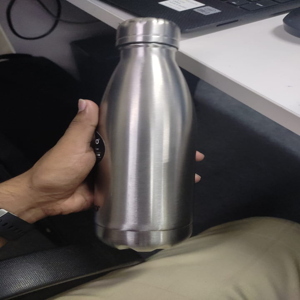

In [90]:
image_search("image of a bottle")

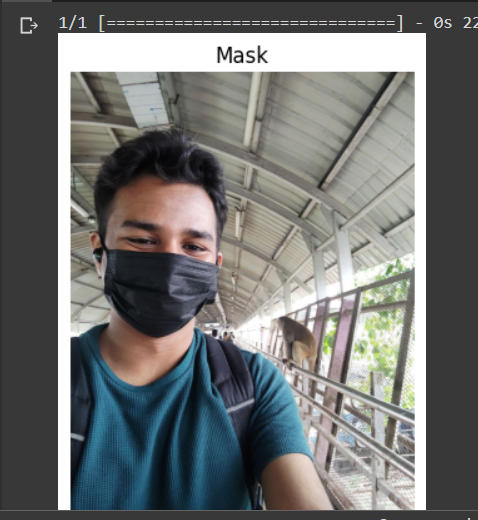

In [59]:
idx

array([3], dtype=int64)